In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_boston, load_iris, load_wine, load_digits, \
                             load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'svg'

from sklearn import tree
from dtreeviz.trees import *
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree


## Regression

In [2]:
df_cars = pd.read_csv("../data/cars.csv")
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']

In [3]:
features_reg_univar = ["WGT"]
target_reg = "MPG"
dtr_univar = DecisionTreeRegressor(max_depth=3, criterion="mae")
dtr_univar.fit(X[features_reg_univar], y)

skdtree_univar = ShadowSKDTree(dtr_univar, X[features_reg_univar], y, features_reg_univar, target_reg)


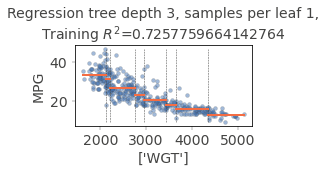

In [4]:
fig, ax = plt.subplots(1,1, figsize=(4,2.5))

rtreeviz_univar(dtr_univar, X[features_reg_univar], y, features_reg_univar, target_reg, ax=ax)

plt.tight_layout()
plt.show()

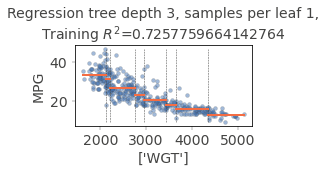

In [5]:
fig, ax = plt.subplots(1,1, figsize=(4,2.5))

rtreeviz_univar(skdtree_univar, ax=ax)

plt.tight_layout()
plt.show()

In [6]:
features_reg_bivar_3d = ["WGT", "ENG"]
target_reg_bivar_3d = "MPG"
dtr_bivar_3d = DecisionTreeRegressor(max_depth=3, criterion="mae")
dtr_bivar_3d.fit(X[features_reg_bivar_3d], y)

skdtree_bivar_3d = ShadowSKDTree(dtr_bivar_3d, X[features_reg_bivar_3d], y, features_reg_bivar_3d, target_reg_bivar_3d)

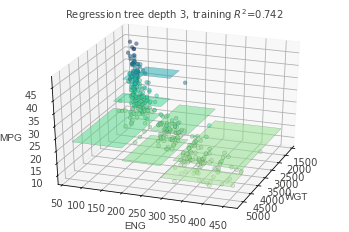

In [7]:
rtreeviz_bivar_3D(dtr_bivar_3d,
                 X[features_reg_bivar_3d], y,
                 feature_names=features_reg_bivar_3d,
                 target_name=target_reg_bivar_3d,
                 fontsize=10,
                 elev=30,
                 azim=20,
                 dist=10,
                 show={'splits','title'},
                 colors={'tesselation_alpha':.5})

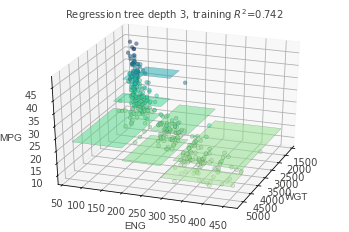

In [8]:
rtreeviz_bivar_3D(skdtree_bivar_3d, 
                 fontsize=10,
                 elev=30,
                 azim=20,
                 dist=10,
                 show={'splits','title'},
                 colors={'tesselation_alpha':.5})

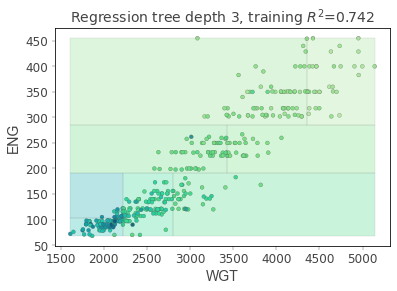

In [9]:
rtreeviz_bivar_heatmap(dtr_bivar_3d, X[features_reg_bivar_3d], y, feature_names=features_reg_bivar_3d, target_name=target_reg_bivar_3d)

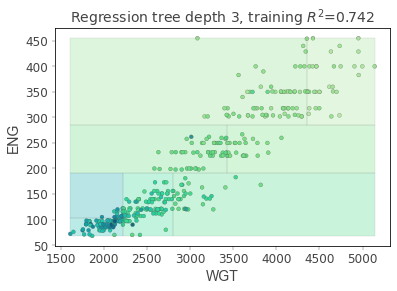

In [10]:
rtreeviz_bivar_heatmap(skdtree_bivar_3d)


## Classification

In [11]:
iris = load_iris()
X = iris.data
X = X[:,2].reshape(-1,1) # petal length (cm)
y = iris.target
len(X), len(y)

feature_c_univar = "petal length (cm)"
target_c_univar = "iris"
class_names_univar = list(iris.target_names)

In [12]:
dtc_univar = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dtc_univar.fit(X, y)

skdtree_c_univar = ShadowSKDTree(dtc_univar, X, y, feature_c_univar, target_c_univar, class_names_univar)

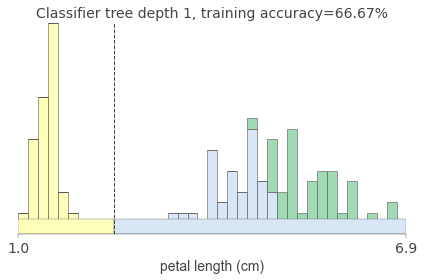

In [13]:
figsize = (6,2)
ctreeviz_univar(dtc_univar, X, y, 
                feature_names=feature_c_univar, target_name=target_c_univar, class_names=class_names_univar,
                nbins=40, gtype='barstacked',
                show={'splits','title'})
plt.tight_layout()
plt.show()


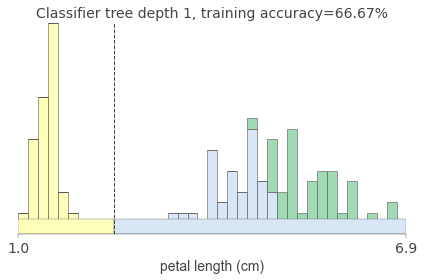

In [14]:
figsize = (6,2)
ctreeviz_univar(skdtree_c_univar,
                nbins=40, gtype='barstacked',
                show={'splits','title'})
plt.tight_layout()
plt.show()

In [15]:
wine = load_wine()
X = wine.data
X = X[:,[12,6]]
y = wine.target
len(X), len(y)

colors = {'classes':
          [None, # 0 classes
          None, # 1 class
          ["#FEFEBB","#a1dab4"], # 2 classes
          ["#FEFEBB","#D9E6F5",'#a1dab4'], # 3
          ]
         }

feature_c_bivar = ['proline','flavanoid']
target_c_bivar = "wine"
class_name_bivar = list(wine.target_names)
feature_c_bivar, target_c_bivar,  class_name_bivar

(['proline', 'flavanoid'], 'wine', ['class_0', 'class_1', 'class_2'])

In [16]:
dtc_bivar = DecisionTreeClassifier(max_depth=2)
dtc_bivar.fit(X, y)

skdtree_c_bivar = ShadowSKDTree(dtc_bivar, X, y, feature_c_bivar, target_c_bivar, class_name_bivar)

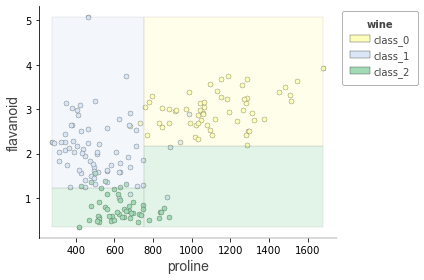

In [17]:
ctreeviz_bivar(dtc_bivar, X, y, 
               feature_names=feature_c_bivar, target_name=target_c_bivar, class_names=class_name_bivar,
               show={'splits', "legend"}, 
               colors={'scatter_edge': 'black'})
plt.tight_layout()
plt.show()

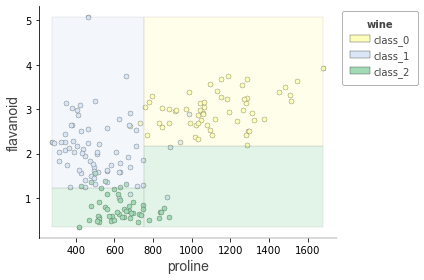

In [18]:
ctreeviz_bivar(skdtree_c_bivar,
               show={'splits', "legend"}, 
               colors={'scatter_edge': 'black'})
plt.tight_layout()
plt.show()